# Lab 6  - Hierarchical Models

# ❗❗❗ Very important administrative detail

The lab changes its content once every **TWO WEEKS**.

*   week 1 & week 2 - lab1
*   week 3 & week 4 - lab2
*   week 5 & week 6 - lab3
*   week 7 & week 8 - lab4
*   week 9 & week 10 - lab5
*   week 11 & week 12 - lab6
*   ...


# Case Study - Hierarchical Partial Pooling

Open and study

A) https://www.pymc.io/projects/examples/en/latest/case_studies/hierarchical_partial_pooling.html

B) https://mc-stan.org/learn-stan/case-studies/pool-binary-trials.html

Note that B) is implemented in Stan, not PyMC, but it offers great insights into different types of pooling.

# Exercise

Write the bayesian models in PyMC for the same exercise, but in a different setting:
1) complete pooling
2) no pooling

Use pm.model_to_graphviz(model) to visualize your hierarchical models.

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor
import seaborn as sns
import pytensor.tensor as pt

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

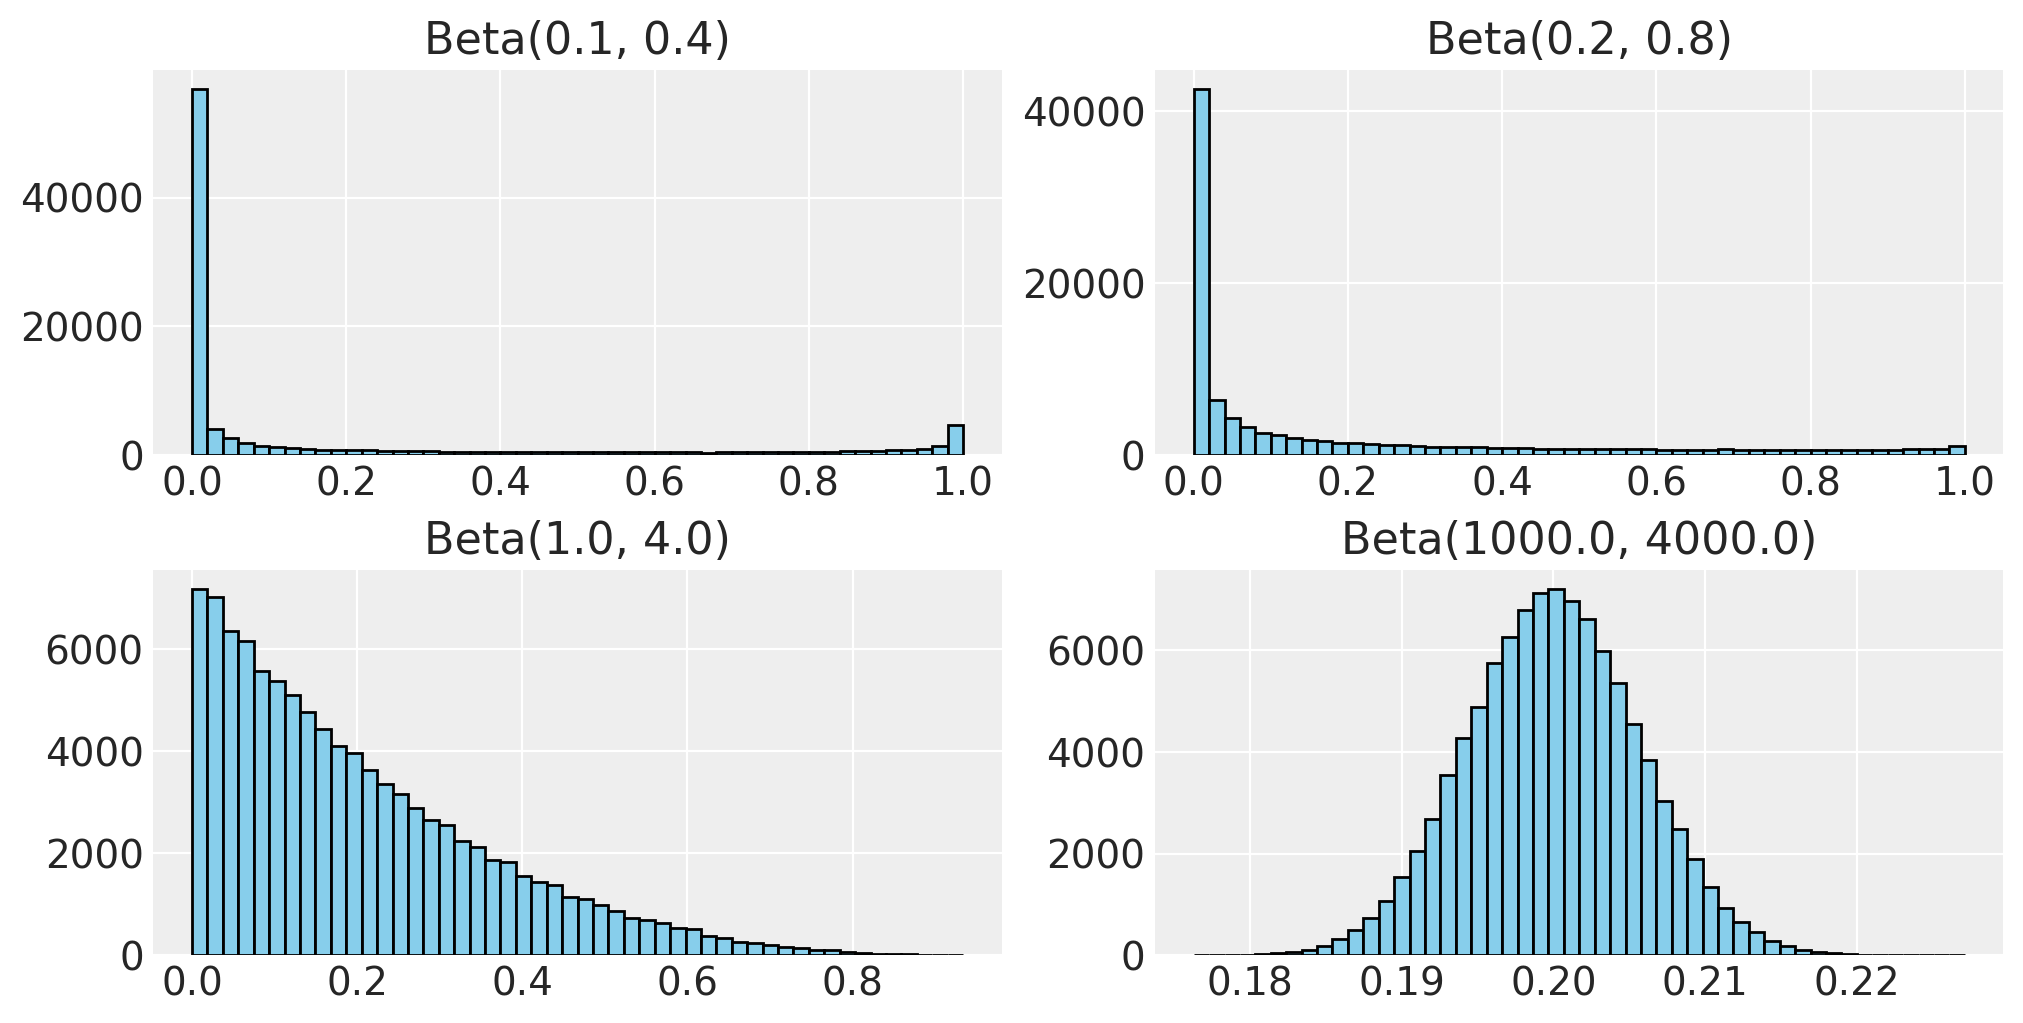

In [ ]:
N = 100000

alphas = [0.2*0.5, 0.2*1, 0.2*5, 0.2*5000]
beta = [0.8*0.5, 0.8*1, 0.8*5, 0.8*5000]

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    v = np.random.beta(a=alpha, b=beta[i], size=N)
    axes[i].hist(v, bins=50, density=False, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Beta({alpha}, {beta[i]})')

plt.show()

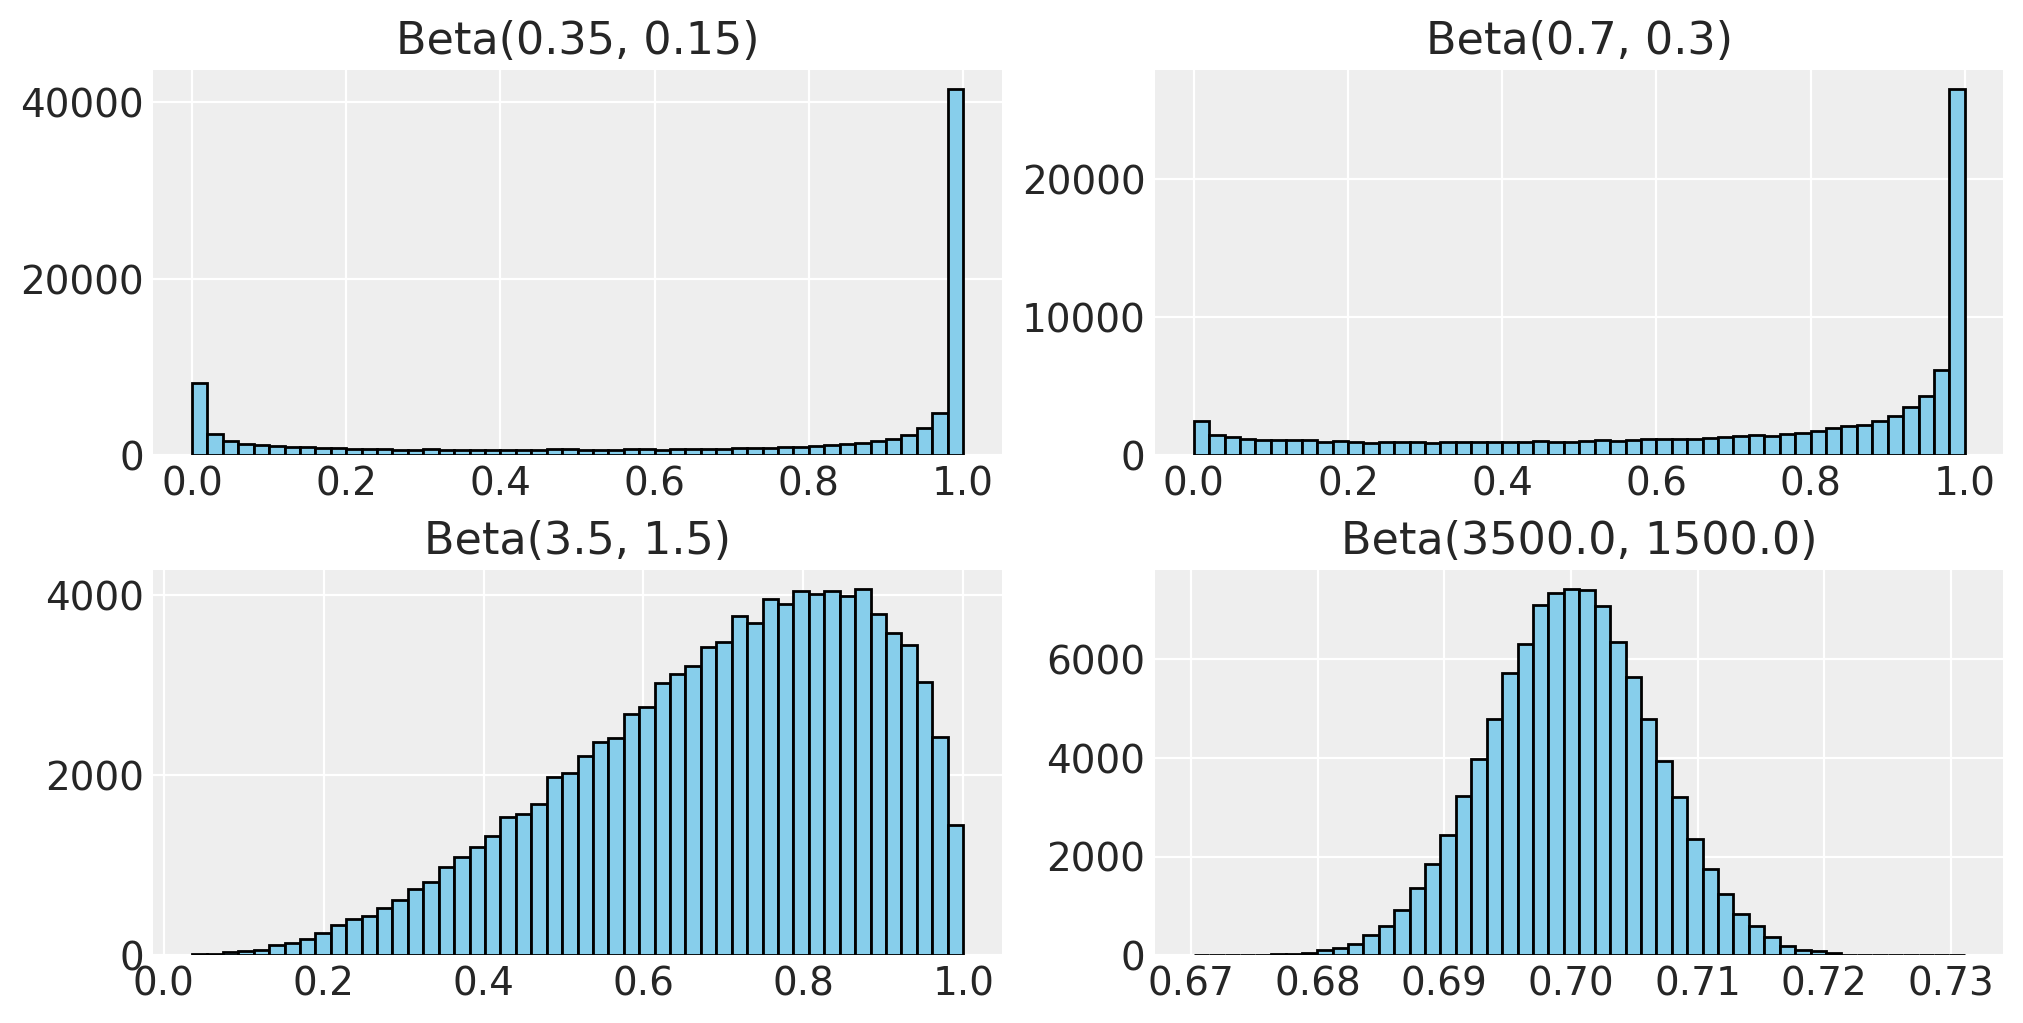

In [ ]:
N = 100000

alphas = [0.7*0.5, 0.7*1, 0.7*5, 0.7*5000]
beta = [0.3*0.5, 0.3*1, 0.3*5, 0.3*5000]

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    v = np.random.beta(a=alpha, b=beta[i], size=N)
    axes[i].hist(v, bins=50, density=False, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Beta({alpha}, {beta[i]})')

plt.show()

## Baseball players case study - no pooling

In [ ]:
df=pd.read_csv("baseball_batting_data.csv")
player_names=df["FirstName"]+df["LastName"]
at_bats, hits = df[["At-Bats", "Hits"]].to_numpy().T

In [ ]:
coords = {"player_names": player_names.tolist()}

In [ ]:
with pm.Model(coords=coords) as no_pooling:
  theta=pm.Beta("theta", 1,1, dims="player_names")
  y=pm.Binomial("obs", n=at_bats, p=theta, dims="player_names", observed=hits)
  trace=pm.sample(draws=4000, tune=1000, chains=2)

Output()

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

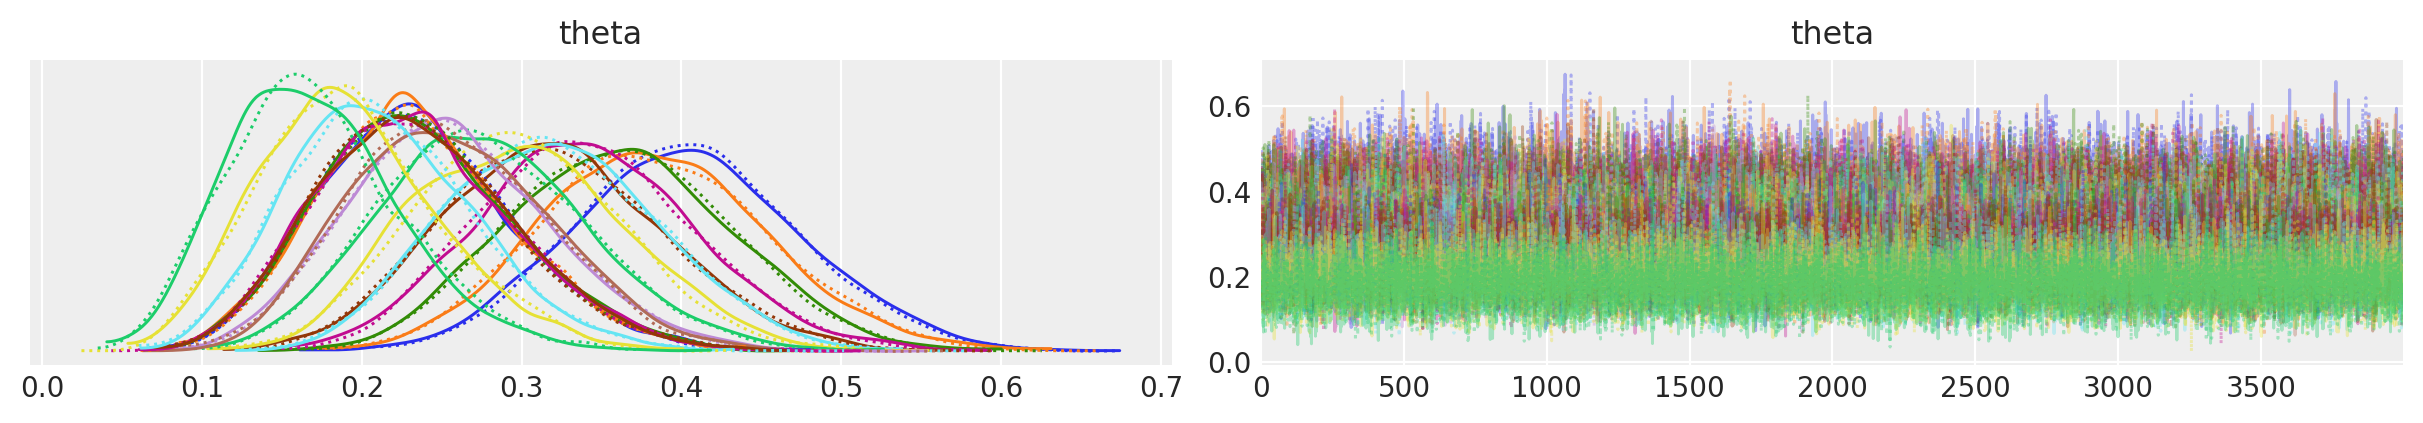

In [ ]:
az.plot_trace(trace, var_names=["theta"])

In [ ]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[RobertoClemente],0.404,0.071,0.276,0.542,0.001,0.001,17878.0,5775.0,1.0
theta[FrankRobinson],0.383,0.071,0.254,0.520,0.001,0.001,17376.0,5675.0,1.0
theta[FrankHoward],0.362,0.069,0.231,0.487,0.000,0.001,19332.0,5519.0,1.0
theta[JayJohnstone],0.341,0.068,0.218,0.471,0.001,0.001,17416.0,5553.0,1.0
theta[KenBerry],0.319,0.069,0.189,0.446,0.001,0.001,16479.0,5498.0,1.0
theta[JimSpencer],0.319,0.066,0.202,0.445,0.000,0.001,17644.0,6154.0,1.0
theta[DonKessinger],0.298,0.066,0.182,0.423,0.001,0.001,17390.0,5871.0,1.0
theta[LuisAlvarado],0.277,0.065,0.150,0.395,0.000,0.001,18766.0,6067.0,1.0
theta[RonSanto],0.256,0.063,0.144,0.379,0.000,0.001,16212.0,6136.0,1.0
theta[RonSwaboda],0.255,0.062,0.144,0.370,0.000,0.001,17350.0,6117.0,1.0


## Baseball players case study - complete pooling

In [ ]:
with pm.Model(coords=coords) as complete_pooling:
  theta=pm.Beta("theta", 1, 1)
  y=pm.Binomial("y_i", n=at_bats, p=theta, dims="player_names", observed=hits)
  trace=pm.sample(draws=4000, tune=1000, chains=2)

Output()

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

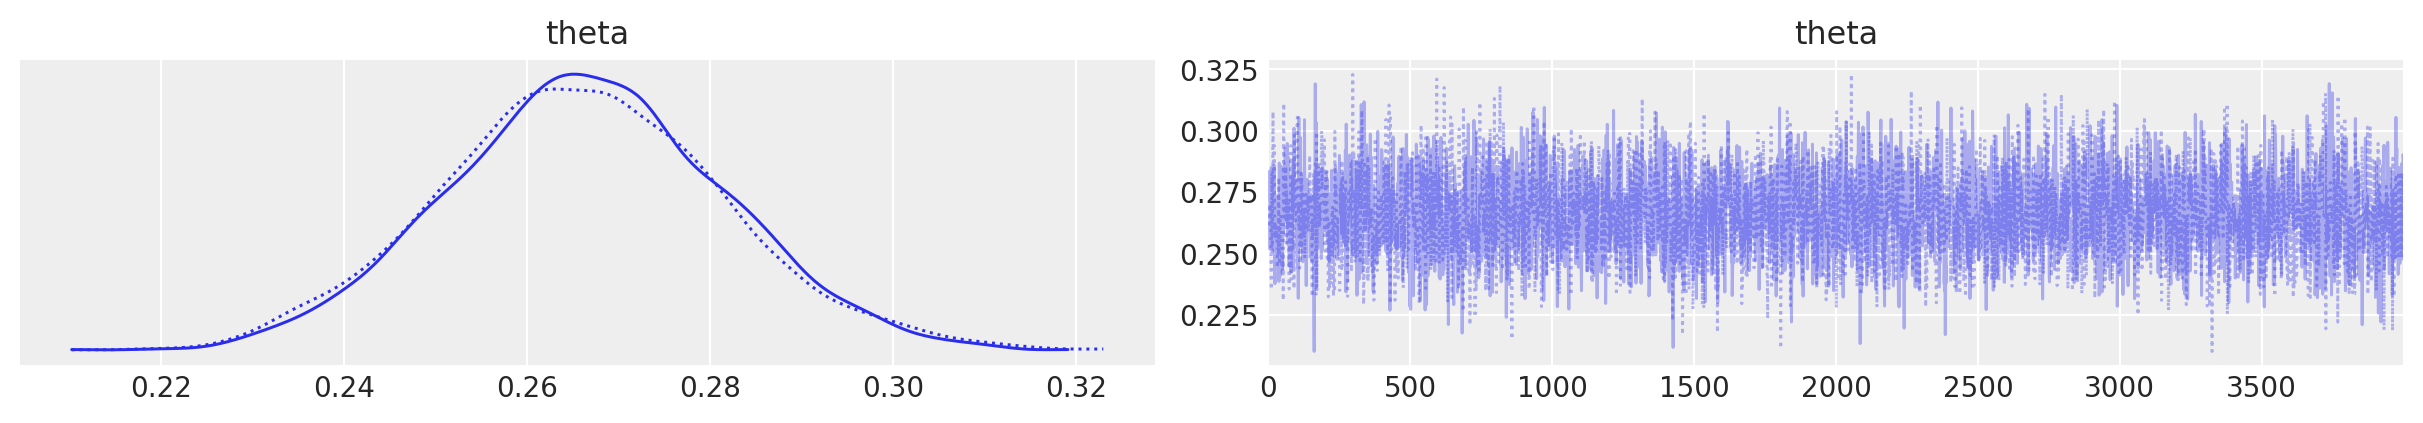

In [ ]:
az.plot_trace(trace, var_names=["theta"])

In [ ]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.266,0.016,0.235,0.295,0.0,0.0,3385.0,5726.0,1.0
